## Get familiar with dataset

In [35]:
import pandas as pd
import nltk
import string
import time

In [36]:
train = pd.read_csv('train.csv')
train.head()

,reviewText,sentiment
0,For a movie that gets no respect there sure ar...,pos
1,Bizarre horror movie filled with famous faces ...,pos
2,"A solid, if unremarkable film. Matthau, as Ein...",pos
3,It's a strange feeling to sit alone in a theat...,pos
4,"You probably all already know this by now, but...",pos


In [37]:
print('sentiment:', train.sentiment[0])
print('reviewText:', train.reviewText[0])

sentiment: pos
reviewText: For a movie that gets no respect there sure are a lot of memorable quotes listed for this gem. Imagine a movie where Joe Piscopo is actually funny! Maureen Stapleton is a scene stealer. The Moroni character is an absolute scream. Watch for Alan "The Skipper" Hale jr. as a police Sgt.


In [38]:
train.sentiment.value_counts()

pos    12500
neg    12500
Name: sentiment, dtype: int64

## Load data

In [39]:
def load_data(path):
    data = pd.read_csv(path)
    x = data.reviewText.tolist()
    y = data.sentiment.tolist()
    return x, y

In [40]:
train_x, train_y = load_data('train.csv')
test_x, test_y = load_data('test.csv')

In [41]:
print('training data size:', len(train_x))
print('testing data size:', len(test_x))

training data size: 25000
testing data size: 25000


In [42]:
train_x[4:8]

["You probably all already know this by now, but 5 additional episodes never aired can be viewed on ABC.com I've watched a lot of television over the years and this is possibly my favorite show, ever. It's a crime that this beautifully written and acted show was canceled. The actors that played Laura, Whit, Carlos, Mae, Damian, Anya and omg, Steven Caseman - are all incredible and so natural in those roles. Even the kids are great. Wonderful show. So sad that it's gone. Of course I wonder about the reasons it was canceled. There is no way I'll let myself believe that Ms. Moynahan's pregnancy had anything to do with it. It was in the perfect time slot in this market. I've watched all the episodes again on ABC.com - I hope they all come out on DVD some day. Thanks for reading.",
 'I saw the movie with two grown children. Although it was not as clever as Shrek, I thought it was rather good. In a movie theatre surrounded by children who were on spring break, there was not a sound so I know

## Preprocessing

In [43]:
#stopwords include preposition(in,on,at), article(a,an,the), pronoun(he,she,it)
#stopwords don't add meaning to a sentence, so they are filtered out to save space and time.
#nltk (natural language toolkit)
lemmatizer = nltk.WordNetLemmatizer()
stopwords = nltk.corpus.stopwords.words('english')
transtbl = str.maketrans(string.punctuation, ' '*len(string.punctuation))

In [44]:
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [45]:
neg_words= ['no', 'nor', 'not',"don't",'ain', 'aren',"aren't", 'couldn',"couldn't", 'didn',"didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',"hasn't",'haven', "haven't", 'isn', "isn't",'mightn',"mightn't", 'mustn',"mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't",'won', "won't", "wouldn't", 'wouldn']

In [52]:
#stopwords_b does not include negative words, like not, nor, doesn't
stopwords_b = [i for i in stopwords if i not in neg_words]
print(stopwords_b)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', '

In [53]:
'not' in stopwords

True

In [54]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [55]:
'abcaabcc'.translate(str.maketrans('ab','de'))

'decddecc'

In [56]:
'abcaabcc'.replace('ab','de')

'decadecc'

In [57]:
def preprocessing(line):
    line = line.replace('<br />', '')
    line = line.translate(transtbl)
    
    tokens = [lemmatizer.lemmatize(t.lower(), 'v')
              for t in nltk.word_tokenize(line)
              if t.lower() not in stopwords]
    return ' '.join(tokens)

In [58]:
#stopwords_b does not include negative words, like not, nor, doesn't
def preprocessing_b(line):
    line = line.replace('<br />', '')
    line = line.translate(transtbl)
    
    tokens = [lemmatizer.lemmatize(t.lower(), 'v')
              for t in nltk.word_tokenize(line)
              if t.lower() not in stopwords_b]
    return ' '.join(tokens)

In [59]:
test_str = "I bought several books yesterday<br /> and I really love them better!"
preprocessing(test_str)

'buy several book yesterday really love better'

In [60]:
start = time.time()
train_x = [preprocessing(x) for x in train_x]
test_x = [preprocessing(x) for x in test_x]
print('Processing time:', time.time()-start)

Processing time: 189.7221279144287


In [61]:
import numpy as np

In [62]:
ptrain = pd.DataFrame(np.column_stack((train_x,train_y)), columns=['reviewText','sentiment'])
ptest = pd.DataFrame(np.column_stack((test_x,test_y)), columns=['reviewText','sentiment'])
ptrain.to_csv('ptrain.csv', index=False)
ptest.to_csv('ptest.csv', index=False)

In [63]:
ptrain = pd.read_csv('ptrain.csv')
ptrain.head()

,reviewText,sentiment
0,movie get respect sure lot memorable quote lis...,pos
1,bizarre horror movie fill famous face steal cr...,pos
2,solid unremarkable film matthau einstein wonde...,pos
3,strange feel sit alone theater occupy parent r...,pos
4,probably already know 5 additional episodes ne...,pos


In [65]:
time.ctime()

'Wed Oct 23 23:49:59 2019'

In [145]:
test_str = "I bought    Several books yesterday and I really love them better!"
print(nltk.word_tokenize(test_str))

['I', 'bought', 'Several', 'books', 'yesterday', 'and', 'I', 'really', 'love', 'them', 'better', '!']


In [146]:
test_str = "I bought    several ,    books yesterday and I really love them better!"
print(test_str.split())

['I', 'bought', 'several', ',', 'books', 'yesterday', 'and', 'I', 'really', 'love', 'them', 'better!']


In [66]:
all_words = [w for line in train_x for w in line.split()]

In [67]:
voca = nltk.FreqDist(all_words)

In [68]:
voca

FreqDist({'film': 48170, 'movie': 43912, 'one': 26747, 'make': 23538, 'like': 22335, 'see': 20773, 'get': 18108, 'time': 16143, 'good': 15124, 'character': 14153, ...})

In [69]:
len(voca)

65081

In [70]:
voca.most_common(10)

[('film', 48170),
 ('movie', 43912),
 ('one', 26747),
 ('make', 23538),
 ('like', 22335),
 ('see', 20773),
 ('get', 18108),
 ('time', 16143),
 ('good', 15124),
 ('character', 14153)]

In [71]:
topwords = [fpair[0] for fpair in voca.most_common(10000)]

In [72]:
print(topwords)

['film', 'movie', 'one', 'make', 'like', 'see', 'get', 'time', 'good', 'character', 'go', 'watch', 'even', 'would', 'think', 'story', 'really', 'well', 'show', 'look', 'much', 'say', 'end', 'know', 'people', 'bad', 'also', 'first', 'great', 'give', 'act', 'take', 'play', 'love', 'come', 'way', 'find', 'could', 'movies', 'seem', 'work', 'plot', 'two', 'many', 'want', 'life', 'never', 'little', 'best', 'try', 'man', 'ever', 'better', 'still', 'scene', 'feel', 'part', 'scenes', 'back', 'something', 'use', 'interest', 'lot', 'real', 'star', 'though', 'cast', 'old', 'thing', 'years', 'actors', 'director', 'leave', 'live', 'guy', 'another', 'new', 'nothing', 'funny', 'write', '10', 'tell', 'actually', 'point', 'start', 'every', 'become', 'set', 'turn', 'world', 'us', 'quite', 'kill', 'things', 'young', 'pretty', 'action', 'happen', 'around', 'horror', 'mean', 'long', 'however', 'fact', 'right', 'big', 'line', 'enough', 'series', 'may', 'original', 'need', 'fan', 'script', 'bite', 'enjoy', 'k

## Vectorizer 

In [73]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [74]:
transformer = TfidfTransformer(smooth_idf=False)

In [75]:
counts = [[3, 0, 1],
          [2, 0, 0],
          [3, 0, 0],
          [4, 0, 0],
          [3, 2, 0],
          [3, 0, 2]]
tfidf = transformer.fit_transform(counts)
tfidf.toarray()

array([[0.81940995, 0.        , 0.57320793],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.47330339, 0.88089948, 0.        ],
       [0.58149261, 0.        , 0.81355169]])

In [76]:
t_corpus = ['the boy love the toy', 'the boy hate the toy']
t_cnt_vec = CountVectorizer()
t_cnt_vec.fit(' '.join(t_corpus).split())
t_cnt_vec.transform(t_corpus).toarray()

array([[1, 0, 1, 2, 1],
       [1, 1, 0, 2, 1]])

In [158]:
t_cnt_vec.get_feature_names()

['boy', 'hate', 'love', 'the', 'toy']

In [159]:
t_corpus = ['the boy love the toy', 'the boy hate the toy']
t_cnt_vec = CountVectorizer()
t_corpus_counts = t_cnt_vec.fit_transform(t_corpus).toarray()
t_corpus_counts

array([[1, 0, 1, 2, 1],
       [1, 1, 0, 2, 1]], dtype=int64)

In [160]:
transformer = TfidfTransformer(smooth_idf=True)
transformer.fit_transform(t_corpus_counts).toarray()

array([[0.35409974, 0.        , 0.49767483, 0.70819948, 0.35409974],
       [0.35409974, 0.49767483, 0.        , 0.70819948, 0.35409974]])

In [161]:
t_corpus = ['the boy love the toy', 'the boy hate the toy']
t_cnt_vec = CountVectorizer()
t_cnt_vec.fit(t_corpus)
t_cnt_vec.transform(t_corpus).toarray()

array([[1, 0, 1, 2, 1],
       [1, 1, 0, 2, 1]])

In [162]:
t_corpus = ['the boy love the toy', 'the boy hate the toy']
t_tfidf_vec = TfidfVectorizer()
t_tfidf_vec.fit(t_corpus)
t_tfidf_vec.transform(t_corpus).toarray()

array([[0.35409974, 0.        , 0.49767483, 0.70819948, 0.35409974],
       [0.35409974, 0.49767483, 0.        , 0.70819948, 0.35409974]])

In [15]:
t_corpus = ['the boy love the toy', 'the boy hate the toy']
t_tfidf_vec = TfidfVectorizer()
t_tfidf_vec.fit(' '.join(t_corpus).split())
t_tfidf_vec.transform(t_corpus).toarray()

array([[0.41508858, 0.        , 0.48828702, 0.6457389 , 0.41508858],
       [0.41508858, 0.48828702, 0.        , 0.6457389 , 0.41508858]])

In [11]:
t_corpus = ['the boy love the toy', 'the boy hate the toy']
t_tfidf_vec = TfidfVectorizer()
t_tfidf_vec.fit(['boy', 'hate', 'love', 'the', 'toy'])
t_tfidf_vec.transform(t_corpus).toarray()

array([[0.37796447, 0.        , 0.37796447, 0.75592895, 0.37796447],
       [0.37796447, 0.37796447, 0.        , 0.75592895, 0.37796447]])

In [20]:
t_tfidf_vec.fit_transform(['boy', 'hate', 'love', 'the', 'toy']).toarray()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [21]:
t_tfidf_vec.idf_

array([2.09861229, 2.09861229, 2.09861229, 2.09861229, 2.09861229])

In [28]:
import numpy as np
from sklearn.preprocessing import normalize
a= np.array([2.09861229, 2.09861229, 2.09861229, 2.09861229, 2.09861229])
b= np.array([[1, 0, 1, 2, 1],
            [1, 1, 0, 2, 1]])
normalize(a*b)

array([[0.37796447, 0.        , 0.37796447, 0.75592895, 0.37796447],
       [0.37796447, 0.37796447, 0.        , 0.75592895, 0.37796447]])

In [30]:
t_tfidf_vec.fit_transform(['boy', 'boy','hate', 'love', 'the', 'the','the', 'the', 'toy', 'toy']).toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [31]:
t_tfidf_vec.idf_

array([2.29928298, 2.70474809, 2.70474809, 1.78845736, 2.29928298])

In [32]:
a= np.array([2.29928298, 2.70474809, 2.70474809, 1.78845736, 2.29928298])
b= np.array([[1, 0, 1, 2, 1],
            [1, 1, 0, 2, 1]])
normalize(a*b)

array([[0.41508858, 0.        , 0.48828702, 0.6457389 , 0.41508858],
       [0.41508858, 0.48828702, 0.        , 0.6457389 , 0.41508858]])

In [13]:
t_tfidf_vec.get_feature_names()

['boy', 'hate', 'love', 'the', 'toy']

In [ ]:
idf = np.array([1, 0, 1.69315, 2, 1])
tf1 = nap.array([])

In [ ]:
#fit: learn the value of itf for each term

## Additional process on  train_x, test_x

In [77]:
# only keep topwords for each review

In [78]:
def add_preprocessing(line):
    tokens = [t for t in nltk.word_tokenize(line)
              if t in topwords]
    return ' '.join(tokens)

In [136]:
start = time.time()
train_x_a = [add_preprocessing(x) for x in train_x]
test_x_a = [add_preprocessing(x) for x in test_x]
print('Processing time is %.2f seconds' %(time.time()-start))

Processing time is 4814.36 seconds


## Feature Extraction

In [80]:
tf_vec = TfidfVectorizer()
tf_vec.fit(topwords)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [81]:
train_features = tf_vec.transform(train_x)
test_features = tf_vec.transform(test_x)

In [82]:
train_features.shape, test_features.shape

((25000, 9966), (25000, 9966))

## Additional Feature Extraction 

In [83]:
tf_vec_a = TfidfVectorizer()

In [84]:
start = time.time()
tf_vec_a.fit(train_x_a)
train_features_a = tf_vec_a.transform(train_x_a)
test_features_a = tf_vec_a.transform(test_x_a)
print("processing time is %.2f seconds" %(time.time()-start) )

processing time is 14.69 seconds


In [85]:
train_features_a.shape, test_features_a.shape

((25000, 9966), (25000, 9966))

## Consider negative words

In [126]:
def load_data(path):
    data = pd.read_csv(path)
    x = data.reviewText.tolist()
    y = data.sentiment.tolist()
    return x, y

In [127]:
train_x, train_y = load_data('train.csv')
test_x, test_y = load_data('test.csv')

In [128]:
topwords_b = list(set(topwords+neg_words))
len(topwords_b)

10039

In [129]:
def preprocessing_b(line):
    line = line.replace('<br />', '')
    line = line.translate(transtbl)
    
    tokens = [lemmatizer.lemmatize(t.lower(), 'v')
              for t in nltk.word_tokenize(line)
              if t.lower() not in stopwords_b]
    return ' '.join(tokens)

In [130]:
start = time.time()
train_x_b = [preprocessing_b(x) for x in train_x]
test_x_b = [preprocessing_b(x) for x in test_x]
print('Processing time:', time.time()-start)

Processing time: 250.5151982307434


In [131]:
tf_vec_b = TfidfVectorizer()
start = time.time()
tf_vec_b.fit(topwords_b)
train_features_b = tf_vec_b.transform(train_x_b)
test_features_b = tf_vec_b.transform(test_x_b)
print("processing time is %.2f seconds" %(time.time()-start) )

processing time is 13.63 seconds


In [125]:
nptrain = pd.DataFrame(np.column_stack((train_x_b,train_y)), columns=['reviewText','sentiment'])
nptest = pd.DataFrame(np.column_stack((test_x_b,test_y)), columns=['reviewText','sentiment'])
nptrain.to_csv('nptrain.csv', index=False)
nptest.to_csv('nptest.csv', index=False)

## Additional Consider negative words
### only keep topwords_b for each review

In [142]:
def preprocessing_c(line):
    
    tokens = [t for t in nltk.word_tokenize(line)
              if t.lower() in topwords_b]
    return ' '.join(tokens)

In [143]:
start = time.time()
train_x_c = [preprocessing_c(x) for x in train_x_b]
test_x_c = [preprocessing_c(x) for x in test_x_b]
print('Processing time is %.2f seconds' %(time.time()-start))

Processing time is 1407.94 seconds


In [144]:
tf_vec_c = TfidfVectorizer()
start = time.time()
tf_vec_c.fit(train_x_c)
train_features_c = tf_vec_c.transform(train_x_c)
test_features_c = tf_vec_c.transform(test_x_c)
print("processing time is %.2f seconds" %(time.time()-start) )

processing time is 15.20 seconds


In [145]:
print('done')

done


### Summary:
### Pick up 1000 topwords from 65081 unique words to generate 9966 features via tf-idf feature extraction method
### train_x(list), test_x(list), train_features(array 25000, 9966), test_features(array25000, 9966)  Tf-idf only fit topwords list  0.8435
### train_x_a(list), test_x_a(list), train_features_a(array25000, 9966), test_features_a(array25000, 9966)  Tf-idf fit the train data which only contain topwords.  0.8329
### train_x_b(list), test_x_b(list), train_features_b(array25000, 9966),  test_features_b(array25000, 9966)  consider negative words, Tf-idf fit topwords_b.   0.8436
### train_x_c(list), test_x_c(list), train_features_c(array25000, 9966),  test_features_c(array25000, 9966)  consider negative words, Tf-idf fit the train data which only contain topwords_b.
## train_x_a(list), test_x_a(list) make more sense.

## Multinomial Naive Bayes(train_features)

In [97]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [98]:
mnb_model = MultinomialNB()
mnb_model

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [99]:
start = time.time()
mnb_model.fit(train_features, train_y)
end = time.time()
print("Multinomial NB model trained in %f seconds" % (end-start))

Multinomial NB model trained in 0.374575 seconds


In [100]:
pred = mnb_model.predict(test_features)
print(pred)

['pos' 'pos' 'pos' ... 'neg' 'neg' 'neg']


In [101]:
nltk.FreqDist(pred)

FreqDist({'neg': 13310, 'pos': 11690})

In [102]:
nltk.FreqDist(test_y)

FreqDist({'pos': 12500, 'neg': 12500})

In [103]:
accuracy = metrics.accuracy_score(pred, test_y)
accuracy

0.84352

In [104]:
print(metrics.classification_report(y_true=test_y, y_pred=pred))

              precision    recall  f1-score   support

         neg       0.82      0.88      0.85     12500
         pos       0.87      0.81      0.84     12500

   micro avg       0.84      0.84      0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.84      0.84      0.84     25000



In [186]:
y_true = [0, 1, 2, 2, 2]
y_pred = [0, 0, 2, 2, 1]
target_names = ['class 0', 'class 1', 'class 2']
print(metrics.classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.50      1.00      0.67         1
     class 1       0.00      0.00      0.00         1
     class 2       1.00      0.67      0.80         3

   micro avg       0.60      0.60      0.60         5
   macro avg       0.50      0.56      0.49         5
weighted avg       0.70      0.60      0.61         5



In [193]:
y_true = [1,'m', 'l', 'n', 'n', 'n',1]
y_pred = [1,'m', 'm', 'n', 'n', 'l',1]
target_names = ['class 1', 'class 0', 'class 2','class 3'](order is 1,lmn)
print(metrics.classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00         2
     class 0       0.00      0.00      0.00         1
     class 2       0.50      1.00      0.67         1
     class 3       1.00      0.67      0.80         3

   micro avg       0.71      0.71      0.71         7
   macro avg       0.62      0.67      0.62         7
weighted avg       0.79      0.71      0.72         7



In [188]:
print('done')

done


## Multinomial Naive Bayes(train_features_a)

In [152]:
mnb_model_a = MultinomialNB()
mnb_model_a

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [153]:
start = time.time()
mnb_model_a.fit(train_features_a, train_y)
end = time.time()
print("Multinomial NB model trained in %f seconds" % (end-start))

Multinomial NB model trained in 0.767738 seconds


In [154]:
pred_a = mnb_model_a.predict(test_features_a)
print(pred_a)

['neg' 'pos' 'pos' ... 'neg' 'neg' 'neg']


In [155]:
nltk.FreqDist(pred_a)

FreqDist({'neg': 13410, 'pos': 11590})

In [156]:
accuracy_a = metrics.accuracy_score(pred_a, test_y)
accuracy_a

0.83288

In [157]:
print(metrics.classification_report(y_true=test_y, y_pred=pred_a))

              precision    recall  f1-score   support

         neg       0.81      0.87      0.84     12500
         pos       0.86      0.80      0.83     12500

   micro avg       0.83      0.83      0.83     25000
   macro avg       0.83      0.83      0.83     25000
weighted avg       0.83      0.83      0.83     25000



## Multinomial Naive Bayes(train_features_b)

In [146]:
mnb_model_b = MultinomialNB()
mnb_model_b

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [147]:
start = time.time()
mnb_model_b.fit(train_features_b, train_y)
end = time.time()
print("Multinomial NB model trained in %f seconds" % (end-start))

Multinomial NB model trained in 0.439806 seconds


In [148]:
pred_b = mnb_model_b.predict(test_features_b)
print(pred_b)

['neg' 'pos' 'pos' ... 'neg' 'neg' 'neg']


In [149]:
nltk.FreqDist(pred_b)

FreqDist({'neg': 13376, 'pos': 11624})

In [150]:
accuracy_b = metrics.accuracy_score(pred_b, test_y)
accuracy_b

0.8436

In [151]:
set(neg_words)&set(topwords)

set()

## Multinomial Naive Bayes(train_features_c)

In [158]:
mnb_model_c = MultinomialNB()
mnb_model_c

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [159]:
start = time.time()
mnb_model_c.fit(train_features_c, train_y)
end = time.time()
print("Multinomial NB model trained in %f seconds" % (end-start))

Multinomial NB model trained in 0.144806 seconds


In [160]:
pred_c = mnb_model_c.predict(test_features_c)
print(pred_c)

['neg' 'pos' 'pos' ... 'neg' 'neg' 'neg']


In [161]:
nltk.FreqDist(pred_c)

FreqDist({'neg': 13426, 'pos': 11574})

In [162]:
accuracy_c = metrics.accuracy_score(pred_c, test_y)
accuracy_c

0.8324

## Predict new sentences 

In [202]:
def predict_new(sentence):
    sentence = preprocessing(sentence)#argument must be string
    features = tf_vec.transform([sentence])#argument must be list
    pred = mnb_model.predict(features)
    return pred   

In [204]:
predict_new('This looks not terrible')

array(['neg'], dtype='<U3')

In [205]:
predict_new('This looks great')

array(['pos'], dtype='<U3')

In [206]:
predict_new('This looks not bad')

array(['neg'], dtype='<U3')

In [258]:
def predict_new_b(sentence):
    sentence = preprocessing_b(sentence)#argument must be string
    features = tf_vec_b.transform([sentence])#argument must be list
    pred = mnb_model_b.predict(features)
    return pred 

In [259]:
predict_new_b('This looks not terrible')

array(['neg'], dtype='<U3')

In [260]:
predict_new_b('This looks not bad')

array(['neg'], dtype='<U3')

In [163]:
def predict_new_c(sentence):
    sentence = preprocessing_b(sentence)#argument must be string
    features = tf_vec_c.transform([sentence])#argument must be list
    pred = mnb_model_c.predict(features)
    return pred 

In [165]:
predict_new_c('This looks not terrible')

array(['neg'], dtype='<U3')

In [167]:
predict_new_c('This looks not bad')

array(['neg'], dtype='<U3')

#### it doesnt improve accuracy to put negtive words into topwords 

## Select N topwords 

In [261]:
def train_n_topwords(n, tfidf=False):
    topwords = [fpair[0] for fpair in voca.most_common(n)]
    if tfidf:
        vec = TfidfVectorizer()
    else:
        vec = CountVectorizer()
    vec.fit(topwords)
    train_features = vec.transform(train_x)
    test_features = vec.transform(test_x)
    
    mnb_model = MultinomialNB()
    mnb_model.fit(train_features, train_y)
    pred = mnb_model.predict(test_features)
    
    return metrics.accuracy_score(pred, test_y), mnb_model

In [263]:
train_n_topwords(500, tfidf=True)

(0.82504, MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))

In [277]:
from my_utils import print_progress
possible_n = [i*500 for i in range(1, 20)]
cnt_accuracies  = []
tfidf_accuracies  = []
for i, n in enumerate(possible_n):
    cnt_accuracies.append(train_n_topwords(n, tfidf=False)[0])
    tfidf_accuracies.append(train_n_topwords(n, tfidf=True)[0])
    print_progress(bar_length=50, decimals=0, iteration=2 * i + 1, total=2*len(possible_n), prefix='Train and verify:')
    

Train and verify: |================================================>.| 97% 

In [274]:
import matplotlib.pyplot as plt
%matplotlib inline

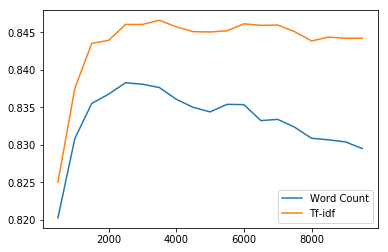

In [278]:
plt.plot(possible_n, cnt_accuracies, label='Word Count')
plt.plot(possible_n, tfidf_accuracies, label='Tf-idf')
plt.legend()

In [280]:
max(tfidf_accuracies), tfidf_accuracies.index(max(tfidf_accuracies))

(0.8466, 6)

In [282]:
train_n_topwords(3500, tfidf=True)[0]

0.8466

###  train_n_topwords 3500 give the best accuracy 0.8466

## Save model 

In [283]:
import pickle

In [284]:
with open('tf_vec.pkl','wb') as pkl_file:
    pickle.dump(tf_vec, pkl_file)

In [285]:
with open('mnb_model.pkl','wb') as pkl_file:
    pickle.dump(mnb_model, pkl_file)